<a href="https://colab.research.google.com/github/fbeilstein/topological_data_analysis/blob/master/lecture_11_wasserstein_distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DEMOS**

* [Homology Explorer](https://fbeilstein.github.io/topological_data_analysis/homology_explorer/homology_explorer.html)
* [Persistent Homology Explorer](https://fbeilstein.github.io/topological_data_analysis/persistent_homology_explorer/persistent_homology_explorer.html)
* [Wasserstein Distance](https://fbeilstein.github.io/topological_data_analysis/wasserstein_distance/wasserstein_distance.html)
* [GUDHI documentation](https://gudhi.inria.fr/python/latest/)

In [7]:
!pip install tadasets gudhi ripser KDEpy
from google.colab import output
output.clear()

In [4]:
#@title Explore persistence diagrams
#import ripser
import gudhi

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import matplotlib as mpl


def unwind_manifold(datapoints):
  dgms = ripser.ripser(datapoints[~np.isnan(datapoints[:,0])])['dgms']
  persistence = [(0, I) for I in dgms[0]] + [(1, I) for I in dgms[1]]
  return persistence
def unwind_manifold(datapoints):
  #dgms = ripser.ripser(datapoints[~np.isnan(datapoints[:,0])])['dgms']
  #persistence = [(0, I) for I in dgms[0]] + [(1, I) for I in dgms[1]]
  _complex = gudhi.AlphaComplex(points=datapoints)
  simplex_tree = _complex.create_simplex_tree()
  simplex_tree.compute_persistence()
  persistence =  simplex_tree.persistence()
  return persistence

def roll(X):
  b_x = np.min(X[:,0])
  k_x = (np.max(X[:,0]) - np.min(X[:,0])) / (2 * np.pi - 0.2)
  b_y = b_x - 0.2
  k_y = 0.5 * (np.max(X[:,1]) - np.min(X[:,1]))
  params = [[(x[0] - b_x)/k_x, (x[1] - b_y)/k_y] for x in X]
  roulette = np.array([[(2 + p[0]) * np.cos(2 * p[0]), (2 + p[0]) * np.sin(2 * p[0]), 2.0 * p[1]] for p in params])
  return roulette

def s_curve(X):
  t = (X[:, 0] - np.min(X[:, 0])) / (np.max(X[:, 0]) - np.min(X[:, 0]))
  t = (t * 2.0 - 1.0) * np.pi * 1.5
  x = np.sin(t)
  y = X[:, 1] / np.max(X[:, 0])# * 2 * np.pi
  z = np.sign(t) * (np.cos(t) - 1)
  return np.vstack((x, y, z)).T

def plane(X):
  p = np.array([[x[0], x[1], x[0] + x[1]] for x in X])
  return p

def torus(X):
  k_x = (X[:,0] - np.min(X[:, 0])) / (np.max(X[:,0]) - np.min(X[:,0])) * (2 * np.pi)
  k_y = (X[:,1] - np.min(X[:, 1])) / (np.max(X[:,1]) - np.min(X[:,1])) * (2 * np.pi)
  c = 1.0
  a = 0.5
  torus = np.array([(c + a * np.cos(k_y)) * np.cos(k_x),
                    (c + a * np.cos(k_y)) * np.sin(k_x),
                    a * np.sin(k_y)]).T
  #torus[torus[:,1] > 0.75, 1] = 0.75
  return torus

def mobius(X):
  b_x = np.min(X[:,0])
  k_x = (np.max(X[:,0]) - np.min(X[:,0])) / (2 * np.pi)
  b_y = 0.5 * (np.max(X[:,1]) + np.min(X[:,1]))
  k_y = 0.5 * (np.max(X[:,1]) - np.min(X[:,1]))
  params = [[(x[0] - b_x)/k_x, (x[1] - b_y)/k_y] for x in X]
  mobius = np.array([[(1.0 + p[1]/2.0 * np.cos(p[0]/2)) * np.cos(p[0]), (1.0 + p[1]/2.0 * np.cos(p[0]/2)) * np.sin(p[0]), p[1]/2.0 * np.sin(p[0]/2)] for p in params])
  return mobius

def cylinder(X):
  b_x = np.min(X[:,0])
  k_x = (np.max(X[:,0]) - np.min(X[:,0])) / (2 * np.pi)
  b_y = 0.5 * (np.max(X[:,1]) + np.min(X[:,1]))
  k_y = 0.5 * (np.max(X[:,1]) - np.min(X[:,1]))
  params = [[(x[0] - b_x)/k_x, (x[1] - b_y)/k_y] for x in X]
  cylinder = np.array([[2.0 * np.cos(p[0]), 2.0 * np.sin(p[0]), p[1]] for p in params])
  return cylinder

def helicoid(X):
  b_x = np.min(X[:,0])
  k_x = (np.max(X[:,0]) - np.min(X[:,0])) / (2 * np.pi)
  b_y = 0.5 * (np.max(X[:,1]) + np.min(X[:,1]))
  k_y = 0.5 * (np.max(X[:,1]) - np.min(X[:,1]))
  params = [[(x[0] - b_x)/k_x, (x[1] - b_y)/k_y] for x in X]
  helicoid = np.array([[p[1] * np.cos(p[0]), p[1] * np.sin(p[0]), 2.0 * p[0]] for p in params])
  return helicoid

def cone(X):
  b_x = np.min(X[:,0])
  k_x = (np.max(X[:,0]) - np.min(X[:,0])) / (2 * np.pi)
  b_y = b_x - 0.2
  k_y = 0.5 * (np.max(X[:,1]) - np.min(X[:,1]))
  params = [[(x[0] - b_x)/k_x, (x[1] - b_y)/k_y] for x in X]
  cone = np.array([[p[1] * np.cos(p[0]), p[1] * np.sin(p[0]), 2.0 * p[1]] for p in params])
  return cone

def sphere(X):
  k_x = 2*np.pi / (np.max(X[:,0]) - np.min(X[:,0]))
  k_y = 2*np.pi / (np.max(X[:,0]) - np.min(X[:,0]))
  X[:,0] = k_x * (X[:,0] - np.min(X[:,0]))
  X[:,1] = k_y * (X[:,1] - np.min(X[:,1]))
  sphere = np.array([np.cos(X[:,0]) * np.sin(X[:,1]),
                     np.sin(X[:,0]) * np.sin(X[:,1]),
                     np.cos(X[:,1])])
  return sphere.T

def transform_to_3d(x, manifold):
  funcs = {'s_curve': s_curve, 'mobius': mobius, 'cylinder': cylinder,
           'helicoid': helicoid, 'cone': cone, 'plane': plane,
           'roll': roll, 'torus': torus, 'sphere': sphere}
  return funcs[manifold](x)

def plot_unwinded(x):
  fig = plt.figure(figsize=(10,10))
  ax = fig.gca()
  #ax.tick_params(axis="y",direction="in", pad=-40)
  #ax.tick_params(axis="x",direction="in", pad=-15)
  #ax.scatter(x[:, 0], x[:, 1], c=cols)
  gudhi.plot_persistence_diagram(x, axes=ax)
  plt.close(fig)
  return fig


import base64
import io

def figure_to_base64(fig):
  buf = io.BytesIO()
  fig.savefig(buf, format='png', bbox_inches='tight', pad_inches=0);
  image_base64 = base64.b64encode(buf.getvalue()).decode('utf-8').replace('\n', '')
  buf.close()
  return image_base64

import json
from IPython.display import display, clear_output
from scipy.spatial import Delaunay


def get_datapoints(manifold):
  N_pts = 500
  funcs = {'s_curve': s_curve, 'mobius': mobius, 'cylinder': cylinder,
           'helicoid': helicoid, 'cone': cone, 'plane': plane,
           'roll': roll}
  if manifold in funcs.keys():
    X = np.random.random_sample((N_pts, 2))
    return funcs[manifold](X)
  if manifold == 'torus':
    # approximatly correct
    X = np.random.random_sample((N_pts, 2))
    return torus(X)
  if manifold == 'sphere':
    X = np.random.random_sample((N_pts, 2))
    X[:,0] *= 2 * np.pi
    X[:,1] = np.arcsin(np.sqrt(X[:,1])) * 2
    return sphere(X)



def get_mesh(manifold):
  pass



def invoke(manifold):
  pts = get_datapoints(manifold) #transform_to_3d(X, manifold)
  unw = unwind_manifold(pts)
  figr = plot_unwinded(unw)
  image_base64 = figure_to_base64(figr)


  x_ = np.linspace(np.min(pts[:, 0]), np.max(pts[:, 0]), num=100)
  y_ = np.linspace(np.min(pts[:, 1]), np.max(pts[:, 1]), num=100)
  xx, yy = np.meshgrid(x_, y_)
  x_vec = np.transpose(np.vstack([xx.ravel(), yy.ravel()]))
  Y = transform_to_3d(x_vec, manifold) #[:,2].reshape((x_.shape[0],y_.shape[0]))

  tri = Delaunay(x_vec, )
  simplices = tri.simplices
  I, J, K = ([triplet[c] for triplet in tri.simplices] for c in range(3))
  #print(Y[:,0].shape, Y[:,1].shape, Y[:,2].shape)
  colors = ['red'] * pts.shape[0]
  return IPython.display.JSON({'image': image_base64,
                               'g_x': Y[:,0].tolist(), 'g_y': Y[:,1].tolist(), 'g_z': Y[:,2].tolist(),
                               's_x': pts[:, 0].tolist(), 's_y': pts[:, 1].tolist(), 's_z': pts[:, 2].tolist(), 's_c': colors,
                               'simplices': [I, J, K]})


import IPython
from google.colab import output

main_str = '''
  <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
  <script type="application/javascript">

    var params = null;
    var debug_txt = "";
    var bg_image = new Image();


    function draw() {
      var canvas = document.getElementById('canvas');
      if (canvas.getContext) {
        var ctx = canvas.getContext('2d');

        ctx.clearRect(0, 0, canvas.width, canvas.height); // cleanup before start
        ctx.drawImage(bg_image, 0, 0, 600, 600);
        ctx.strokeRect(0, 0, 600, 600); // field

        ctx.font = '20px serif';
        ctx.fillStyle = 'black';
        ctx.fillText(debug_txt, 200, 200);
      }
    }

    var timer

   function plot_3d(g_x, g_y, g_z, simp)
   {
     cell_for_plot = document.getElementById('for_plotly_plot');
     //Plotly.deleteTraces(cell_for_plot, [0, 1]);
     var data = [{
           x: g_x,
           y: g_y,
           z: g_z,
           i: simp[0],
           j: simp[1],
           k: simp[2],
           type: 'mesh3d',
           opacity: 0.4,
           showscale: false,
           colorscale: "Viridis"
        }];
     var layout = {
          title: 'Manifold',
          autosize: false,
          width: 600,
          height: 600,
          showlegend: false,
          scene: {
            camera: {
              up: {x: 0, y: 1, z: 0},
              center: {x: 0, y: 0, z: 0},
              eye: {x: 0.0, y: -1.0, z: 1.4}
            }
          }
        };
     //debug_txt = 'before plot';
     Plotly.newPlot(cell_for_plot, data, layout);
     //debug_txt = 'go';
   }

   function plot_scatter(s_x, s_y, s_z, colors)
   {
     cell_for_plot = document.getElementById('for_plotly_plot');
     var data = [{
           x: s_x,
           y: s_y,
           z: s_z,
           type: 'scatter3d',
           mode: 'markers',
           marker: {
             size: 4,
             color: colors,
             line: {
               width: 2,
               color: 'rgba(0, 0, 0, 0.5)'
             }
           }
        }];
     var layout = {
          title: 'Manifold',
          autosize: false,
          width: 600,
          height: 600,
          showlegend: false,
          margins: {l: 0, r: 0, b: 0, t: 0},
          scene: {
            camera: {
              up: {x: 0, y: 1, z: 0},
              center: {x: 0, y: 0, z: 0},
              eye: {x: 0.0, y: -1.0, z: 1.4}
            }
          }
        };
    //Plotly.newPlot(cell_for_plot, data, layout);
    Plotly.plot(cell_for_plot, data, {});
   }


    var cur_depth = 100;

    async function calculate() {
      var e = document.getElementById("select_kernel");
      var mfld_name = e.options[e.selectedIndex].value;
      const result = await google.colab.kernel.invokeFunction('notebook.InvSVM', [mfld_name], {});
      params = result.data['application/json'];

      bg_image.src = 'data:image/  png;base64,' + params.image;
      //cell_for_plot = document.getElementById('for_plotly_plot');

      plot_3d(params.g_x, params.g_y, params.g_z, params.simplices);
      plot_scatter(params.s_x, params.s_y, params.s_z, params.s_c);

    }

 </script>

<div id="everything" style="height:600px;">
<div id="for_plotly_plot" style="position:absolute; top:0px; left:0px; height:600px; width:600px;">
</div>
<div id="custom_controls" style="position:absolute; top:0px; left:600px;">
  <canvas id="canvas" width="600" height="600"></canvas>
  <div style="position:absolute; top:0px; left:-600px;">
   Manifold:
   <select id="select_kernel">
       <option value="plane">Plane in 3D</option>
       <option value="mobius">Mobius strip</option>
       <option value="s_curve">S-shaped sheet</option>
       <option value="cylinder">Cylinder</option>
       <option value="helicoid">Helicoid</option>
       <option value="cone">Cone</option>
       <option value="roll">Swiss Roll</option>
       <option value="torus">Torus</option>
       <option value="sphere">Sphere</option>
   </select>
    <button type="button" onclick="calculate();">
      Diagram
    </button>
  </div>
</div>
<div>

<script>
function init()
{
  timer = setInterval(draw, 10);
}

init();
</script>
'''

display(IPython.display.HTML(main_str))
output.register_callback('notebook.InvSVM', invoke)

In [ ]:
#@title ##Wasserstein distance

%%html
<svg width="295mm" height="100mm" version="1.1" viewBox="0 0 293.04 146.83" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="Arrow1Mstart" overflow="visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#000000" fill-rule="evenodd" stroke="#000000" stroke-width="1pt"/>
  </marker>
  <marker id="marker1692" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#000000" fill-rule="evenodd" stroke="#000000" stroke-width="1pt"/>
  </marker>
  <marker id="marker1365" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#575757" fill-rule="evenodd" stroke="#575757" stroke-width="1pt"/>
  </marker>
  <marker id="marker1331" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#575757" fill-rule="evenodd" stroke="#575757" stroke-width="1pt"/>
  </marker>
  <marker id="marker1309" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#575757" fill-rule="evenodd" stroke="#575757" stroke-width="1pt"/>
  </marker>
  <marker id="Arrow1Mend" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#575757" fill-rule="evenodd" stroke="#575757" stroke-width="1pt"/>
  </marker>
  <marker id="marker1692-9" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#000000" fill-rule="evenodd" stroke="#000000" stroke-width="1pt"/>
  </marker>
  <marker id="Arrow1Mstart-4" overflow="visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#000000" fill-rule="evenodd" stroke="#000000" stroke-width="1pt"/>
  </marker>
  <marker id="marker1692-9-3" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#000000" fill-rule="evenodd" stroke="#000000" stroke-width="1pt"/>
  </marker>
  <marker id="Arrow1Mstart-2" overflow="visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#000000" fill-rule="evenodd" stroke="#000000" stroke-width="1pt"/>
  </marker>
  <marker id="marker1692-9-1" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#000000" fill-rule="evenodd" stroke="#000000" stroke-width="1pt"/>
  </marker>
  <marker id="Arrow1Mstart-5" overflow="visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#000000" fill-rule="evenodd" stroke="#000000" stroke-width="1pt"/>
  </marker>
  <marker id="marker1692-9-0" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#000000" fill-rule="evenodd" stroke="#000000" stroke-width="1pt"/>
  </marker>
  <marker id="Arrow1Mstart-40" overflow="visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#000000" fill-rule="evenodd" stroke="#000000" stroke-width="1pt"/>
  </marker>
  <marker id="marker1692-9-6" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#000000" fill-rule="evenodd" stroke="#000000" stroke-width="1pt"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(4.287 9.9831)">
  <path d="m17.387 127v-110.37" fill="#575757" marker-end="url(#Arrow1Mend)" stroke="#575757" stroke-width=".665"/>
  <path d="m17.387 127h110.37" fill="#575757" marker-end="url(#marker1309)" stroke="#575757" stroke-width=".665"/>
  <g fill="#00baee" fill-opacity=".97727">
   <path d="m17.387 127 109.2-109.2" stroke="#848484" stroke-dasharray="3.46, 3.46" stroke-width=".865"/>
   <circle cx="32.38" cy="76.771" r="2.4253" opacity=".999"/>
   <circle cx="37.242" cy="47.906" r="2.4253" opacity=".999"/>
   <circle cx="58.839" cy="64.164" r="2.4253" opacity=".999"/>
   <circle cx="73.712" cy="40.976" r="2.4253" opacity=".999"/>
   <circle cx="62.777" cy="27.416" r="2.4253" opacity=".999"/>
  </g>
  <g>
   <path d="m169.39 125.14v-110.37" fill="#575757" marker-end="url(#marker1331)" stroke="#575757" stroke-width=".665"/>
   <path d="m169.39 125.14h110.37" fill="#575757" marker-end="url(#marker1365)" stroke="#575757" stroke-width=".665"/>
   <path d="m169.39 125.14 109.2-109.2" fill="#00baee" fill-opacity=".97727" stroke="#848484" stroke-dasharray="3.46, 3.46" stroke-width=".865"/>
  </g>
  <g fill="#ff8700">
   <circle cx="189.69" cy="87.032" r="2.4102" opacity=".999"/>
   <circle cx="183.09" cy="38.813" r="2.4102" opacity=".999"/>
   <circle cx="208.86" cy="61.451" r="2.4102" opacity=".999"/>
   <circle cx="227.1" cy="29.877" r="2.4102" opacity=".999"/>
   <circle cx="208.59" cy="29.26" r="2.4102" opacity=".999"/>
   <circle cx="253.91" cy="13.096" r="2.4102" opacity=".999"/>
  </g>
  <g fill="none" stroke="#000000">
   <path d="m253.91 16.237v22.451" marker-end="url(#marker1692)" stroke-width=".265"/>
   <g stroke-width=".265">
    <path d="m66.149 25.664c49.956-19.805 94.183-22.092 138.45 0.80181" marker-end="url(#marker1692-9)" marker-start="url(#Arrow1Mstart)"/>
    <path d="m75.448 37.867c44.611-50.808 104.34-33.317 148.6-10.424" marker-end="url(#marker1692-9-3)" marker-start="url(#Arrow1Mstart-4)"/>
    <path d="m35.573 75.102c49.956-19.805 106.86-13.49 151.13 9.4035" marker-end="url(#marker1692-9-1)" marker-start="url(#Arrow1Mstart-2)"/>
    <path d="m61.817 61.988c49.956-19.805 99.929-25.567 144.19-2.6727" marker-end="url(#marker1692-9-0)" marker-start="url(#Arrow1Mstart-5)"/>
    <path d="m40.74 46.007c49.956-19.805 94.767-32.842 139.03-9.9476" marker-end="url(#marker1692-9-6)" marker-start="url(#Arrow1Mstart-40)"/>
   </g>
  </g>
  <g font-family="'Courier New'">
   <text x="75.217262" y="-2.2678602" font-size="10.583px" stroke-width=".26458" style="line-height:1.25" xml:space="preserve"><tspan x="75.217262" y="-2.2678602" fill="#00baee" font-family="'Helvetica CY'" stroke-width=".26458">PD1</tspan></text>
   <text x="224.46104" y="-2.0009978" font-size="10.583px" stroke-width=".26458" style="line-height:1.25" xml:space="preserve"><tspan x="224.46104" y="-2.0009978" fill="#ff8700" font-family="'Helvetica CY'" stroke-width=".26458">PD2</tspan></text>
   <text x="273.73236" y="134.90125" font-size="8.0953px" stroke-width=".20238" style="line-height:1.25" xml:space="preserve"><tspan x="273.73236" y="134.90125" fill="#000000" fill-opacity=".50379" font-family="'Helvetica CY'" stroke-width=".20238">Birth</tspan></text>
   <g font-size="8.0953px" stroke-width=".20238">
    <text x="123.43045" y="136.66573" style="line-height:1.25" xml:space="preserve"><tspan x="123.43045" y="136.66573" fill="#000000" fill-opacity=".50379" font-family="'Helvetica CY'" stroke-width=".20238">Birth</tspan></text>
    <text x="147.44394" y="20.514193" style="line-height:1.25" xml:space="preserve"><tspan x="147.44394" y="20.514193" fill="#000000" fill-opacity=".50379" font-family="'Helvetica CY'" stroke-width=".20238">Death</tspan></text>
    <text x="-4.7968845" y="20.403486" style="line-height:1.25" xml:space="preserve"><tspan x="-4.7968845" y="20.403486" fill="#000000" fill-opacity=".50379" font-family="'Helvetica CY'" stroke-width=".20238">Death</tspan></text>
   </g>
  </g>
 </g>
</svg>


###Matching points
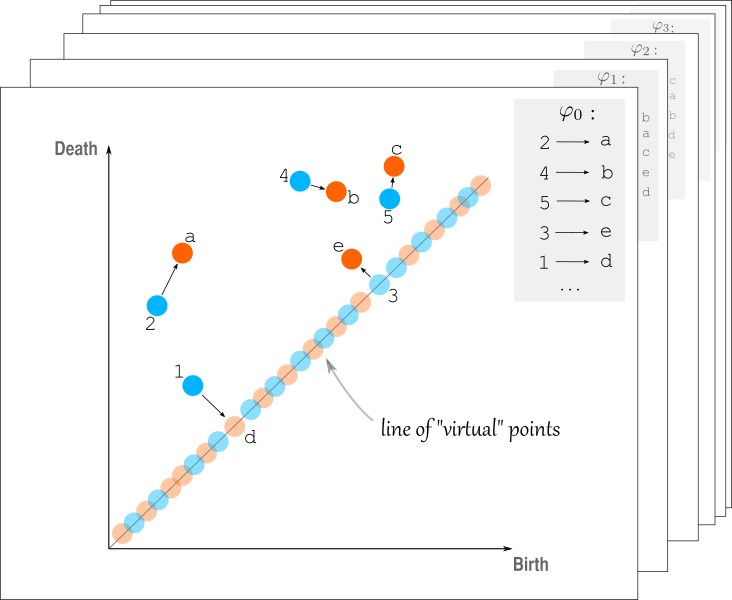

In probability theory and computational topology there is a widely used notion of $p$-Wasserstain distance
$$    
W_p(X; Y) =
\left(
    \inf_{\varphi: X \rightarrow Y}
       \sum_{x \in X}
          \|x - \varphi(x)\|_{\infty}^p
\right)^{1/p}\hspace{-4.5mm},
$$
that provides distance between two multisets $X$, $Y$ (sets that allow multiple instances of any element).


The idea of this distance is the following: first, we match elements of $X$ and $Y$ one-to-one (bijection $\varphi$) in a certain way (suppose it can be performed for now).
For each pair of elements $x \in X$ and $\varphi(x) = y \in Y$, we can calculate how much do they differ (the cost function) $\|x - \varphi(x)\|_{\infty}$ that is basically $L_\infty$ norm.
Adding up the $p$-th degrees $\|\cdot\|_\infty^p$ we get a notion of the difference between the whole multisets $X$ and $Y$ under the matching $\varphi:X \to Y$.
Taking the infimum over all possible bijections $\varphi$, we get the difference between multisets $X$ and $Y$ under the best matching possible effectively removing $\varphi$ from further consideration.
Now, taking the root of $p$-th order transforms the whole expressions into a well-defined distance that satisfies all axioms of metric.

Let us consider this distance with respect to our problem.
As we tracked how Betti numbers change with respect to radius $r$, the topological features were ``born'' and ``died''. Thus we got a persistence interval $[r_b;r_d]$ for each feature (can be represented as a point on a plane).
$X$ and $Y$ will now represent sets of such intervals calculated on different point clouds.
The $L_\infty$ norm for two such intervals is defined as
$$
\left\|
   \left[r_b^A; r_d^A\right] - \left[r_b^B; r_d^B\right]
\right\|_\infty =
\max\left(
   \left|r_b^A - r_b^B\right|, \left|r_d^A - r_d^B\right|
\right),
$$

where $r_b^A$, $r_d^A$, $r_b^B$, $r_d^B$ are "birth" and "death" radii.

One more adjustment in the procedure is necessary since the persistence diagrams consist of finitely many points above the diagonal that can vary in number depending on the initial point cloud they were generated from. To this finite multiset, we add the infinitely many points on the diagonal, each with infinite multiplicity (``virtual points'') and allow matching with them. These extra points are not essential to the diagram, but their presence allows us to find bijection $\varphi$ even in cases there are different numbers of persistence intervals in $X$ and $Y$ as shown in figure.


One may note that taking infimum over all possible $\varphi$ we will always end up in a situation when most of the diagonal points are mapped to the diagonal points with the same coordinates thus adding $0$ (i.e. smallest possible $||x-\varphi(x)||_\infty^p$) to the total cost function. Only the ones matched with the off-diagonal points will add to the total cost.


The bottleneck distance is the Wasserstein distance, with parameter $p \to \infty$.
Finding the appropriate limit, it can be shown that
$$
W_\infty(X; Y) =
\inf_{\varphi: X \rightarrow Y} \sup_{x \in X} \|x- \varphi(x)\|_\infty.
$$



In [5]:
#@title Ripps complex & Bottleneck distance for noisy data (install &  rerun!)
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import ripser
import persim
import tadasets
import matplotlib.pyplot as plt
import numpy as np

data_clean = tadasets.dsphere(d=1, n=100, noise=0.0)
noise_range = (0.0, 0.3, 0.01)
noises = np.linspace(noise_range[0], noise_range[1], num=int(1+(noise_range[1] - noise_range[0])/noise_range[2]))
data_noisy = [tadasets.dsphere(d=1, n=100, noise=nv) for nv in noises]
dgm_clean = ripser.ripser(data_clean)['dgms'][1]
dgm_noisy = [ripser.ripser(dn)['dgms'][1] for dn in data_noisy]

def draw_callback(x):
  idx = int(x / noise_range[2])
  fig, ax = plt.subplots(1,2, figsize=(10,5))

  ax[0].scatter(data_clean[:,0], data_clean[:,1], label="clean data")
  ax[0].scatter(data_noisy[idx][:,0], data_noisy[idx][:,1], label="noisy data")
  ax[0].axis('equal')
  ax[0].legend()

  #persim.plot_diagrams([dgm_clean, dgm_noisy[idx]] , labels=['Clean $H_1$', 'Noisy $H_1$'], ax=ax[1])
  distance_bottleneck, matching = persim.bottleneck(dgm_clean, dgm_noisy[idx], matching=True)
  persim.bottleneck_matching(dgm_clean, dgm_noisy[idx], matching, labels=['Clean $H_1$', 'Noisy $H_1$'], ax=ax[1])
  ax[1].set_xlim([0.0, 2.0])
  ax[1].set_ylim([0.0, 2.0])
  ax[1].set_title('$W_\infty = $' + str(distance_bottleneck))
  plt.show()


interact(draw_callback, x=noise_range);

interactive(children=(FloatSlider(value=0.15, description='x', max=0.3, step=0.01), Output()), _dom_classes=('…

In [9]:
#@title Bottleneck Distance and Noise

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import ripser
import persim
import tadasets
import matplotlib.pyplot as plt
import gudhi
import numpy as np
from KDEpy import FFTKDE
from sklearn.neighbors import KernelDensity
import seaborn as sns
sns.set_style("whitegrid")
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

def get_persistence_intervals(point_set):
  return ripser.ripser(point_set)['dgms']
  #alpha_complex = gudhi.RipsComplex(points=point_set)
  #simplex_tree = alpha_complex.create_simplex_tree()
  #simplex_tree.compute_persistence()
  #persistence_intervals_0 = simplex_tree.persistence_intervals_in_dimension(0)
  #persistence_intervals_1 = simplex_tree.persistence_intervals_in_dimension(1)
  #return persistence_intervals_0, persistence_intervals_1

data_clean = tadasets.dsphere(d=1, n=100, noise=0.0)
basis_I = get_persistence_intervals(data_clean)

noise_range = (0.0, 0.3, 0.03)
noises = np.linspace(noise_range[0], noise_range[1], num=int(1+(noise_range[1] - noise_range[0])/noise_range[2]))
W_0, W_1 = [], []
for noise in noises:
  distances_0, distances_1 = [], []
  for _ in range(50):
    pts_noisy = tadasets.dsphere(d=1, n=100, noise=noise)
    I_noisy = get_persistence_intervals(pts_noisy)
    dist_0 = float(gudhi.bottleneck_distance(basis_I[0], I_noisy[0]))
    dist_1 = float(gudhi.bottleneck_distance(basis_I[1], I_noisy[1]))
    distances_0.append(dist_0)
    distances_1.append(dist_1)
  W_0.append(distances_0)
  W_1.append(distances_1)

def plot_data(ax, W, box_color='b', shift=0.0):
  ax.set_xlabel("Noise")
  ax.set_ylabel("$W_\infty$ distance")
  xu = noises
  medians = [np.median(w) for w in W]
  #import warnings
  #warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
  ax.boxplot(W,
              showmeans=True, positions=xu + shift, widths=0.006,
              boxprops=dict(color=box_color),
              whiskerprops=dict(color=box_color),
              capprops=dict(color=box_color),
              flierprops=dict(color=box_color, markeredgecolor=box_color))
  ax.plot(xu + shift, medians, c=box_color)
  ax.set_xlim(np.min(xu)-0.025, np.max(xu)+0.025)
  ax.set_navigate(False)
  ax.set_xticks(xu)
  ax.set_xticklabels(xu)

def plot_pdf(ax, data_, pdf_color, limits, label):
  data = np.array(data_)
  kde = FFTKDE(bw='silverman', kernel='gaussian')
  kde.fit(data)(None)
  b_w = kde.bw
  kde = KernelDensity(bandwidth=b_w, kernel='gaussian')
  kde.fit(data.reshape(-1, 1))
  x_d = np.linspace(limits[0], limits[1], 1001)
  logprob = kde.score_samples(x_d.reshape(-1, 1))
  plt.plot(data, np.full_like(data, 0.0), markeredgewidth=1, color=pdf_color)
  ax.set_title('Pdf approximation')
  ax.set_xlabel('$W_\infty$ distance for Homologies', fontsize=18)
  ax.set_ylabel('Probability density function', fontsize=18)
  ax.fill_between(x_d, np.exp(logprob), alpha=0.3, label=label, color=pdf_color)




legend_elements = [
                    Line2D([0], [0], marker='o', color='w',
                          label='$0$ homologies',
                          markerfacecolor='r', markersize=10),
                   Line2D([0], [0], marker='o', color='w',
                          label='$1$ homologies',
                          markerfacecolor='b', markersize=10)
                   ]

def draw_callback(x):
  idx = int(x / noise_range[2])

  fig, axs = plt.subplots(1, 2, figsize=(20,6))

  plot_data(axs[0], W_0, box_color='r', shift=-0.001)
  plot_data(axs[0], W_1, box_color='b', shift=+0.001)
  axs[0].legend(handles=legend_elements, loc='upper left', prop={'size': 12})

  lims = [np.min(W_0[idx]+W_1[idx]), np.max(W_0[idx]+W_1[idx])]
  plot_pdf(axs[1], W_0[idx], pdf_color='r', limits=lims, label='$H_0$')
  plot_pdf(axs[1], W_1[idx], pdf_color='b', limits=lims, label='$H_1$')
  axs[1].legend()

  plt.show()


interact(draw_callback, x=noise_range);


interactive(children=(FloatSlider(value=0.15, description='x', max=0.3, step=0.03), Output()), _dom_classes=('…

[COSMOLOGY LINK](https://colab.research.google.com/github/mtsizh/bottleneck-distance-for-sigma8/blob/main/wasserstein_distance.ipynb)